In [259]:
import pandas as pd
import matplotlib.pyplot as plt

In [260]:
abbreviation_to_name = {
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States.
    "AK": "Alaska",
    "AL": "Alabama",
    "AR": "Arkansas",
    "AZ": "Arizona",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "IA": "Iowa",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "MA": "Massachusetts",
    "MD": "Maryland",
    "ME": "Maine",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MO": "Missouri",
    "MS": "Mississippi",
    "MT": "Montana",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "NE": "Nebraska",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NV": "Nevada",
    "NY": "New York",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VA": "Virginia",
    "VT": "Vermont",
    "WA": "Washington",
    "WI": "Wisconsin",
    "WV": "West Virginia",
    "WY": "Wyoming",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Federal_district.
    "DC": "District of Columbia",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Inhabited_territories.
    "AS": "American Samoa",
    "GU": "Guam GU",
    "MP": "Northern Mariana Islands",
    "PR": "Puerto Rico PR",
    "VI": "U.S. Virgin Islands",
}

In [261]:
df  = pd.read_csv('2023 Censorship Attack Every Library Manual Copy - Sheet1.csv')
print(df.head())
print(df.columns)

  Last_Updated Data_Entry_Date     ID  New_Book_Author  \
0          NaN      02/14/2023  14288   Maas, Sarah J.   
1          NaN      02/14/2023  14289   Maas, Sarah J.   
2          NaN      02/14/2023  14290   Hopkins, Ellen   
3          NaN      02/14/2023  14291  Ginsberg, Allen   
4          NaN      02/14/2023  14292      Cast, P. C.   

                             New_Book_Title                  Series_Name  \
0                          Empire of Storms                          NaN   
1            A Court of Frost and Starlight  A Court of Thorns and Roses   
2                               Burned (EH)                          NaN   
3  Allen Ginsburg Collected Poems 1947-1980                          NaN   
4                                    Chosen               House of Night   

  Book_Co_Author Illustrators Challenge_Type       Challenge_Init  ...  \
0            NaN          NaN        Unclear  Affiliation Unknown  ...   
1            NaN          NaN        Unclear  

In [262]:
df.dtypes

Last_Updated            object
Data_Entry_Date         object
ID                       int64
New_Book_Author         object
New_Book_Title          object
Series_Name             object
Book_Co_Author          object
Illustrators            object
Challenge_Type          object
Challenge_Init          object
Initial_Response        object
Challenge_Notes         object
Decision                object
Restrictions            object
Restriction_Details     object
Library_Type            object
Month                   object
Year                   float64
State                   object
Overseeing_Agency       object
City                    object
County                  object
Sch_Name                object
Lib_name                object
Police                  object
Book_Status             object
Links1                  object
Links2                  object
Links3                  object
Links4                  object
Unnamed: 30             object
dtype: object

In [263]:
df = df.drop(columns=['ID', 'Series_Name', 'Illustrators', 'Challenge_Type', 'Challenge_Init', 'Challenge_Notes', 'Restrictions','Initial_Response', 'Restriction_Details', 'Month', 'Year', 'Overseeing_Agency', 'County', 'Sch_Name', 'Lib_name', 'Police', 'Book_Status', 'Links1', 'Links2', 'Links3', 'Links4' ])

In [264]:
df.isnull().sum()

Last_Updated       13735
Data_Entry_Date     6887
New_Book_Author        4
New_Book_Title         0
Book_Co_Author     14915
Decision            1471
Library_Type           2
State                 37
City               13684
Unnamed: 30        14892
dtype: int64

In [265]:
def null_pct(df):
    return dict(zip(df.columns, [round(100*len(df.loc[df[c].isnull()])/len(df),2) for c in df.columns]))
print(df.shape)
_= [print(a, b) for a,b in null_pct(df).items()]
df = df.rename(columns={'publication':'Title',
                        'author':'Author',
                        'state_arc':'State',
                        'reason':'Description'})
df['Country'] = 'USA'
df["New_Book_Author"] = df["New_Book_Author"].replace("NONE", None)
#df['State'] = df['State'].map(lambda x: abbreviation_to_name[x.upper()])

(15409, 10)
Last_Updated 89.14
Data_Entry_Date 44.69
New_Book_Author 0.03
New_Book_Title 0.0
Book_Co_Author 96.79
Decision 9.55
Library_Type 0.01
State 0.24
City 88.81
Unnamed: 30 96.64


<Axes: xlabel='New_Book_Title'>

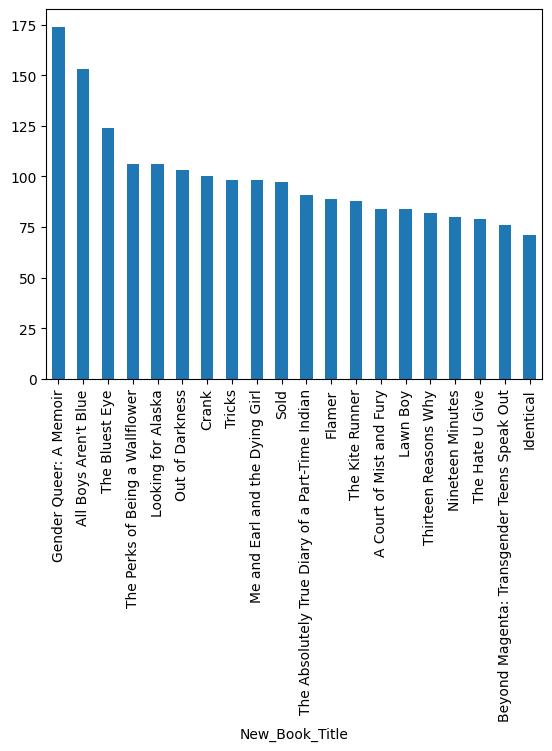

In [266]:
df.groupby('New_Book_Title').size().sort_values(ascending=False)[:20].plot.bar()

<Axes: xlabel='State'>

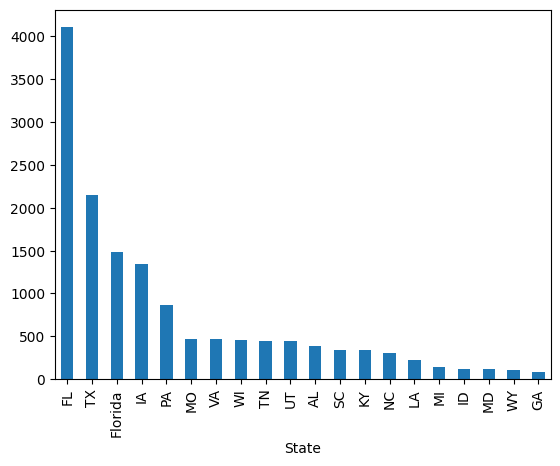

In [267]:
df.groupby('State').size().sort_values(ascending=False)[:20].plot.bar()